## Problem 1

Write a Python routine that performs the optimization of a scaled quadratic function and the Rosenbrock function

$$f_1(x, y) = x^2 + 100 y^2 \qquad\qquad f_2(x, y) = (1 - x)^2 + 100(y - x^2)^2,$$

using gradient descent and Newton's method. Consider different step-sizes $\eta = 0.001, 0.01, 0.1, 1$. Take your initial starting location as $(-1, 1)$. Comment on the following: What is the effect of step-size on the different problems, and algorithms? Study this using a plot of the objective function value vs the iterate number, and a plot that shows the progress on a contour plot of the landscape. When the algorithm does converge, how many steps does it take to reach the minimum? Give reasons for your observations.

### Solution:

In [8]:
import jax
import functools
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Defining the functions
# Quadratic Function:
def f1(X):
    x, y = X
    return x**2 + 100 * y**2

def g1(X):
    x, y = X
    return jnp.array([2 * x, 200 * y])

def H1(X):
    x, y = X
    return jnp.array([[2, 0], [0, 200]])

# Rosenbrock Function
def f2(X):
    x, y = X
    return (1 - x)**2 + 100 * (y - x**2)**2

def g2(X):
    x, y = X
    return jnp.array([400 * x**3 - 400 * x * y + 2 * x - 2, 200 * (y - x**2)])

def H2(X):
    x, y = X
    return jnp.array([[1200 * x**2 - 400 * y + 2, -400 * x], [-400 * x, 200]])

In [3]:
@functools.partial(jax.jit, static_argnums = (0, 1, 2, 4))
def gradient_descent(f, g, H, X, eta):
    # Given function f, grad g, hessian H (unused), location X_i and stepsize eta 
    # this function performs one step of newton descent to return X_{i + 1}
    return X - eta * g(X)

@functools.partial(jax.jit, static_argnums = (0, 1, 2, 4))
def newtons_method(f, g, H, X, eta):
    # Given function f, grad g, hessian H, location X_i and stepsize eta 
    # this function performs one step of newton descent to return X_{i + 1}
    return X - eta * jnp.linalg.inv(H(X)) @ g(X)

In [4]:
def perform_optimization(opt, f, g, H, X0, eta, max_its, tolerance):
    # Setting X initially:
    X = X0
    # Setting lists to track progress:
    X_history = [X]
    f_history = [f(X)]
    its       = 0
    while(f(X) > tolerance and its < max_its):
        X = opt(f, g, H, X, eta)
        # Tracking variables:
        X_history.append(X)
        f_history.append(f(X))
        # Updating the iteration counter:
        its += 1
    
    return jnp.array(f_history), jnp.array(X_history)

In [5]:
X0          = jnp.array([-1., 1.])
# Maximum number of iterations to try:
max_its     = 5000
# Setting tolerance for termination:
tolerance   = 1e-6

In [6]:
# Setting step-size:
eta = 0.001
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

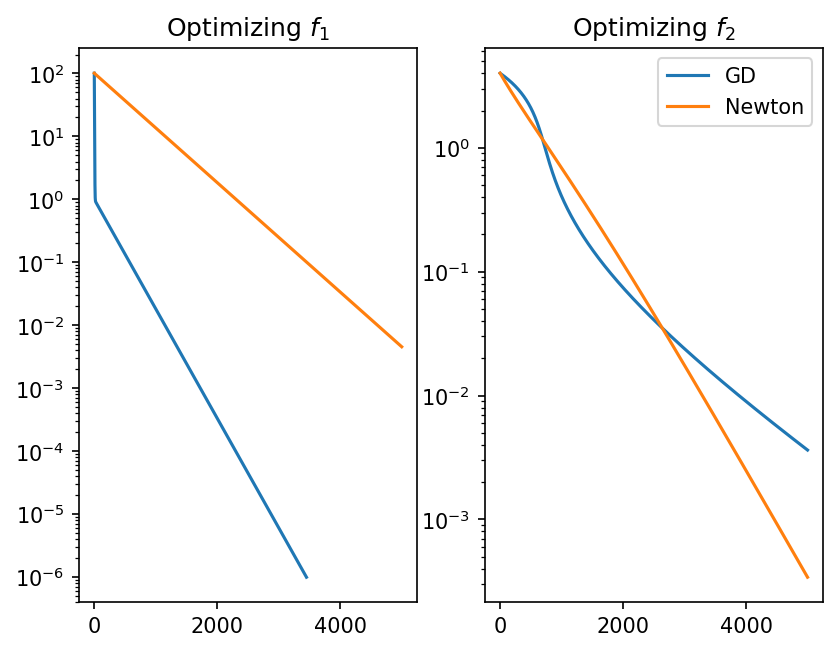

In [9]:
plt.figure(dpi = 150)
plt.subplot(1, 2, 1)
plt.semilogy(f1_gd, label = 'GD')
plt.semilogy(f1_newton, label = 'Newton')
plt.title('Optimizing $f_1$')

plt.subplot(1, 2, 2)
plt.semilogy(f2_gd, label = 'GD')
plt.semilogy(f2_newton, label = 'Newton')
plt.title('Optimizing $f_2$')
plt.legend()

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

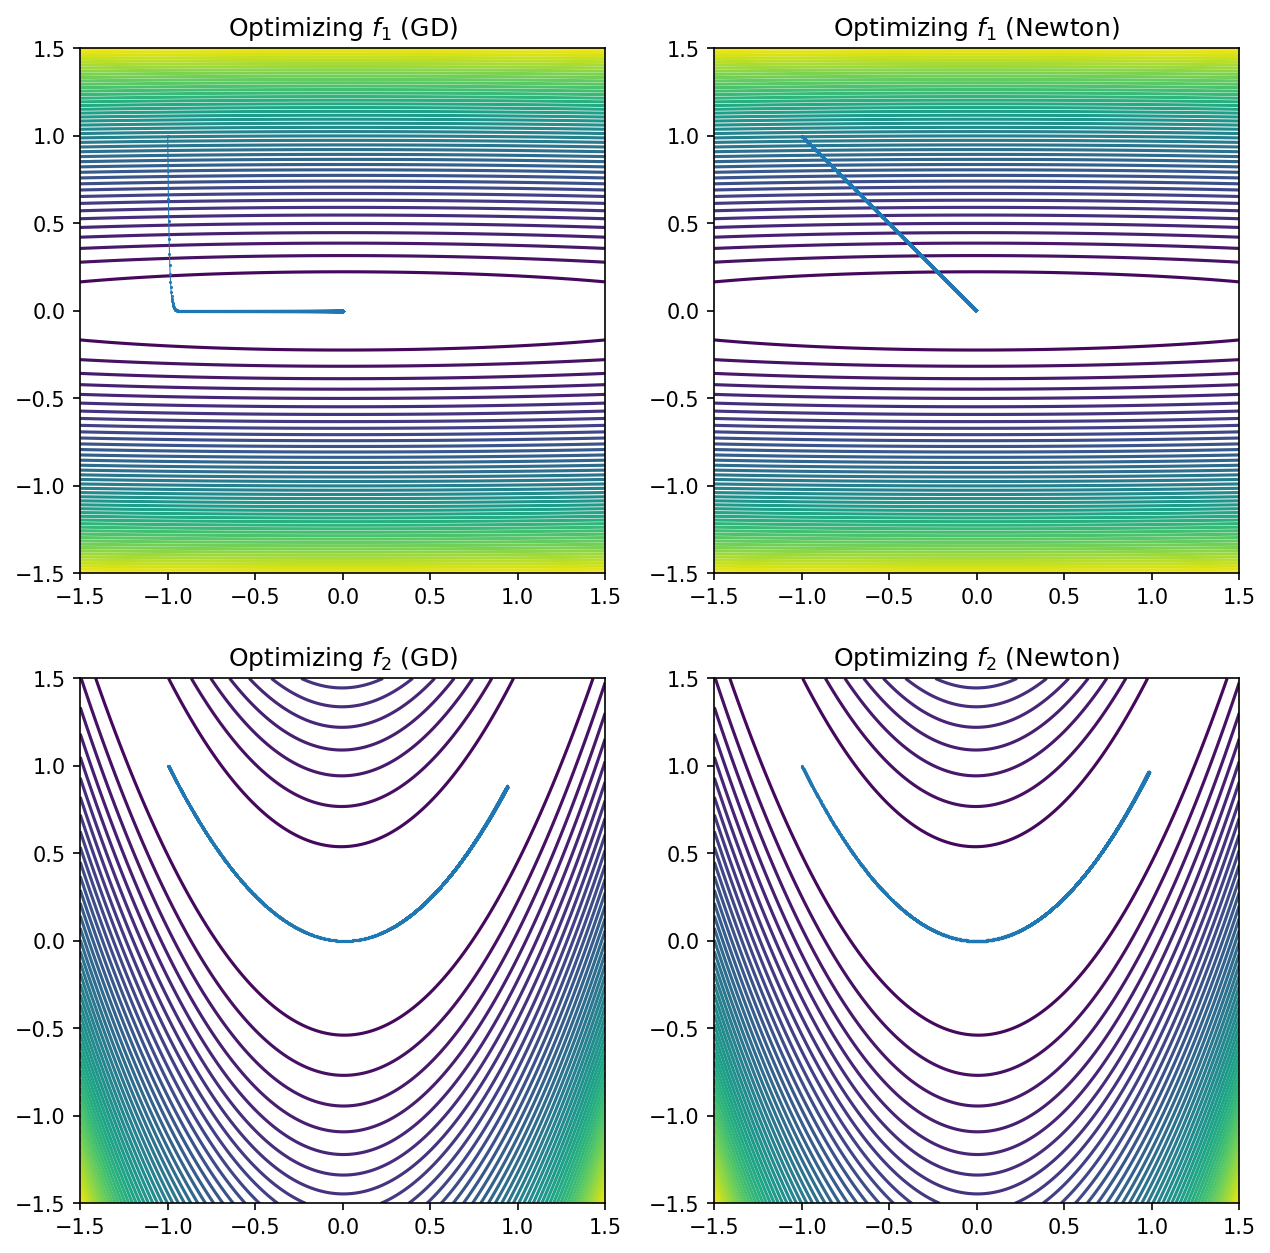

In [10]:
x, y = jnp.meshgrid(jnp.linspace(-1.5, 1.5, 301), jnp.linspace(-1.5, 1.5, 301))

pl.figure(dpi = 150, figsize = (10, 10))
pl.subplot(2, 2, 1)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_gd[:, 0], X1_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (GD)')

pl.subplot(2, 2, 2)
pl.contour(x, y, f1([x, y]), 50)
pl.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_1$ (Newton)')

pl.subplot(2, 2, 3)
pl.contour(x, y, f2([x, y]), 50)
pl.plot(X2_gd[:, 0], X2_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_2$ (GD)')

pl.subplot(2, 2, 4)
pl.contour(x, y, f2([x, y]), 50)
pl.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
pl.gca().set_aspect('equal')
pl.title('Optimizing $f_2$ (Newton)')

As one can observe, gradient descent moves perpendicular to the contour lines. However, this may not necessarily be the best search direction. For $f_1$, clearly the direction picked by Newton's method is the one that's the shortest path to reach the minimum. For this function, since we have considered a step-size of $\eta = 0.001$ we don't see a significant improvement over GD (here it's worse for the choice of step-size for $f_1$). However, it really begins to shine with the right step-size. While, $\eta = 0.001$ works really well for gradient descent. Actually, as you'll see in the later case of $\eta = 1$, Newton's method converges in a single step. This is due to the fact Newton's method is an optimization method is based on a quadratic approximation of the function. Hence, for the quadratic function it'll yield an exact solution. Another interesting property of the Newton's method is its [affine invariance](https://www.stat.cmu.edu/~ryantibs/convexopt-S15/scribes/14-newton-scribed.pdf#page=3). In contrast, gradient descent struggles when dealing with poorly scaled landscapes

The Rosenbrock function on the other hand is a rather challenging problem, and is often used as a test problem for optimization algorithms. The challenge lies in the fact that the minimum is hiding in the valley which is easy to arrive at. However, it is notoriously difficult (slow) to reach the correct minimum. With this step-size, both methods make very slow progress in arriving at the minimum.

In [11]:
# Setting step-size:
eta = 0.01
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

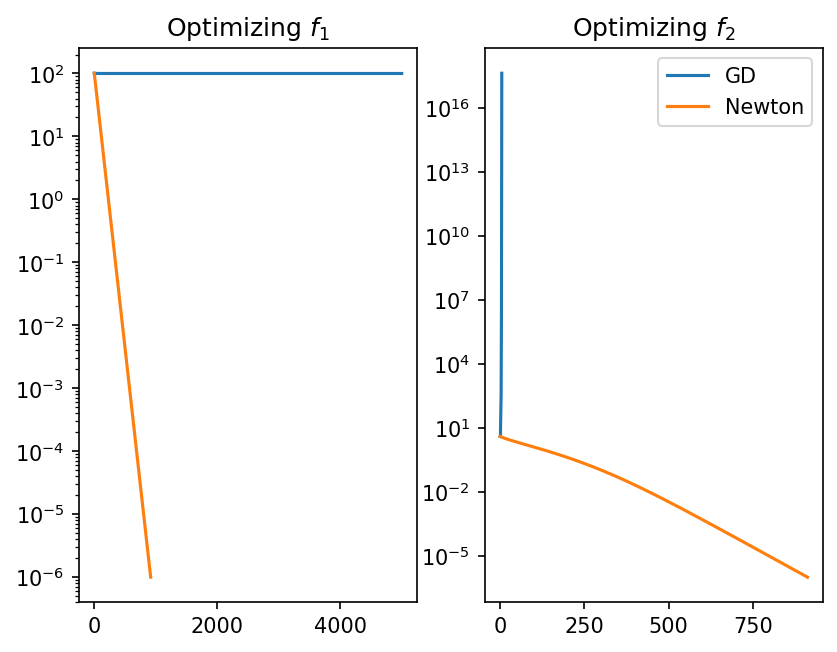

In [12]:
plt.figure(dpi = 150)
plt.subplot(1, 2, 1)
plt.semilogy(f1_gd, label = 'GD')
plt.semilogy(f1_newton, label = 'Newton')
plt.title('Optimizing $f_1$')

plt.subplot(1, 2, 2)
plt.semilogy(f2_gd, label = 'GD')
plt.semilogy(f2_newton, label = 'Newton')
plt.title('Optimizing $f_2$')
plt.legend()

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

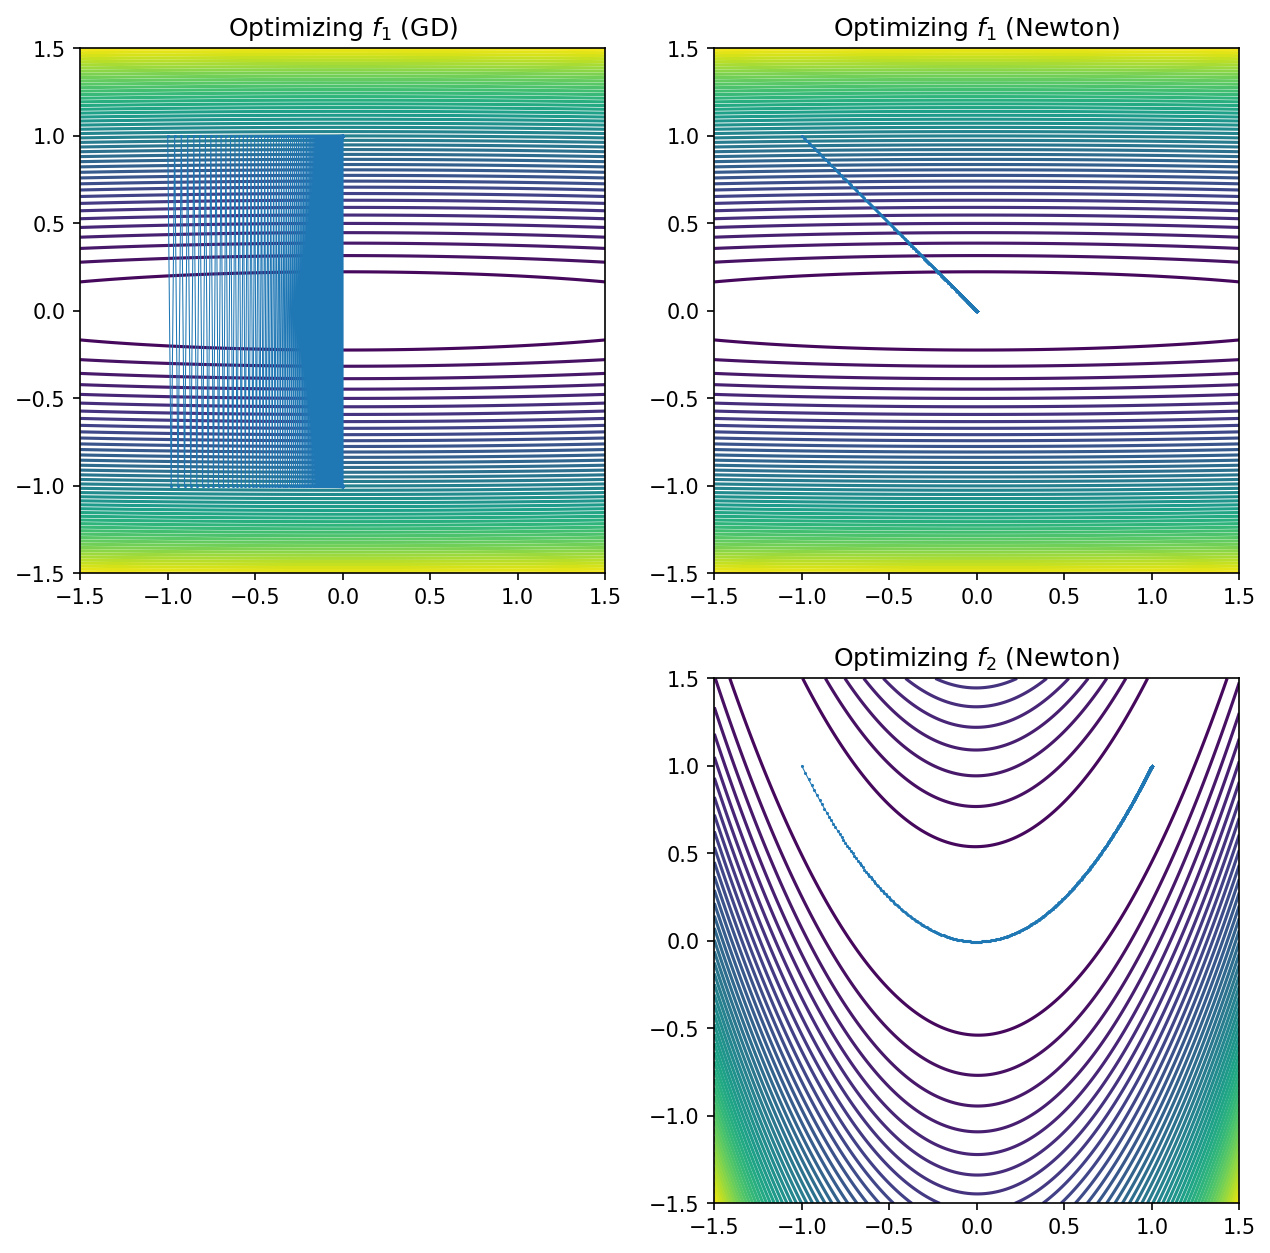

In [13]:
plt.figure(dpi = 150, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.contour(x, y, f1([x, y]), 50)
plt.plot(X1_gd[:, 0], X1_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.gca().set_aspect('equal')
plt.title('Optimizing $f_1$ (GD)')

plt.subplot(2, 2, 2)
plt.contour(x, y, f1([x, y]), 50)
plt.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.gca().set_aspect('equal')
plt.title('Optimizing $f_1$ (Newton)')

# Skipping this!
# NOTE: As we can see the choice of stepsize results in GD to blow up!
# pl.subplot(2, 2, 3)
# pl.contour(x, y, f2([x, y]), 50)
# pl.plot(X2_gd[:, 0], X2_gd[:, 1], '-o', markersize = 0.5, lw = 0.5)
# pl.gca().set_aspect('equal')
# pl.title('Optimizing $f_2$ (GD)')

plt.subplot(2, 2, 4)
plt.contour(x, y, f2([x, y]), 50)
plt.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.gca().set_aspect('equal')
plt.title('Optimizing $f_2$ (Newton)')

Due to the large scaling term in $y$, GD just ends up bouncing back and forth between the contourlines at $y = \pm 1$, and fails to ever reach the minimum:
\begin{align}
    \nabla f_1(x, y) &= (2 x, 200 y) \\
    \implies \eta \nabla f_1(x, y) &= (0.02 x, 2 y) \\
    (x_1, y_1) &= (x_0, y_0) - \eta \nabla f_1(x_0, y_0) = (-1, 1) - (-0.02, 2) = (-0.98, -1) \\
    (x_2, y_2) &= (x_1, y_1) - \eta \nabla f_1(x_1, y_1) = (-0.98, -1) - (-0.0196, -2) = (-0.9604, 1) \\
    \vdots
\end{align}

Similarly, we notice that GD blows up when trying the optimize the Rosenbrock function. Clearly, for our problems $\eta \geq 0.01$ wouldn't work well. However, Newton's method does well in arriving at the minimum.

In [14]:
# Setting step-size:
eta = 0.1
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

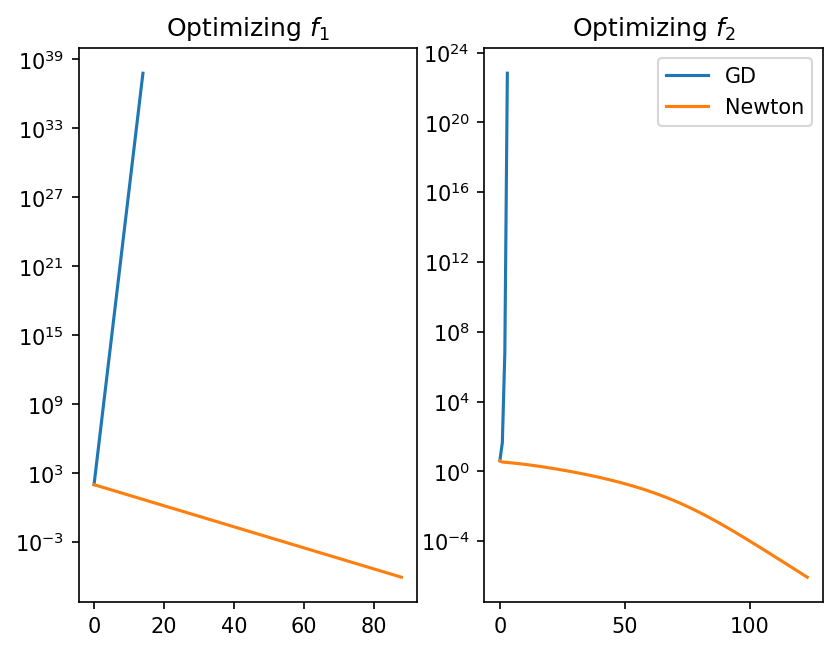

In [15]:
plt.figure(dpi = 150)
plt.subplot(1, 2, 1)
plt.semilogy(f1_gd, label = 'GD')
plt.semilogy(f1_newton, label = 'Newton')
plt.title('Optimizing $f_1$')

plt.subplot(1, 2, 2)
plt.semilogy(f2_gd, label = 'GD')
plt.semilogy(f2_newton, label = 'Newton')
plt.title('Optimizing $f_2$')
plt.legend()

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

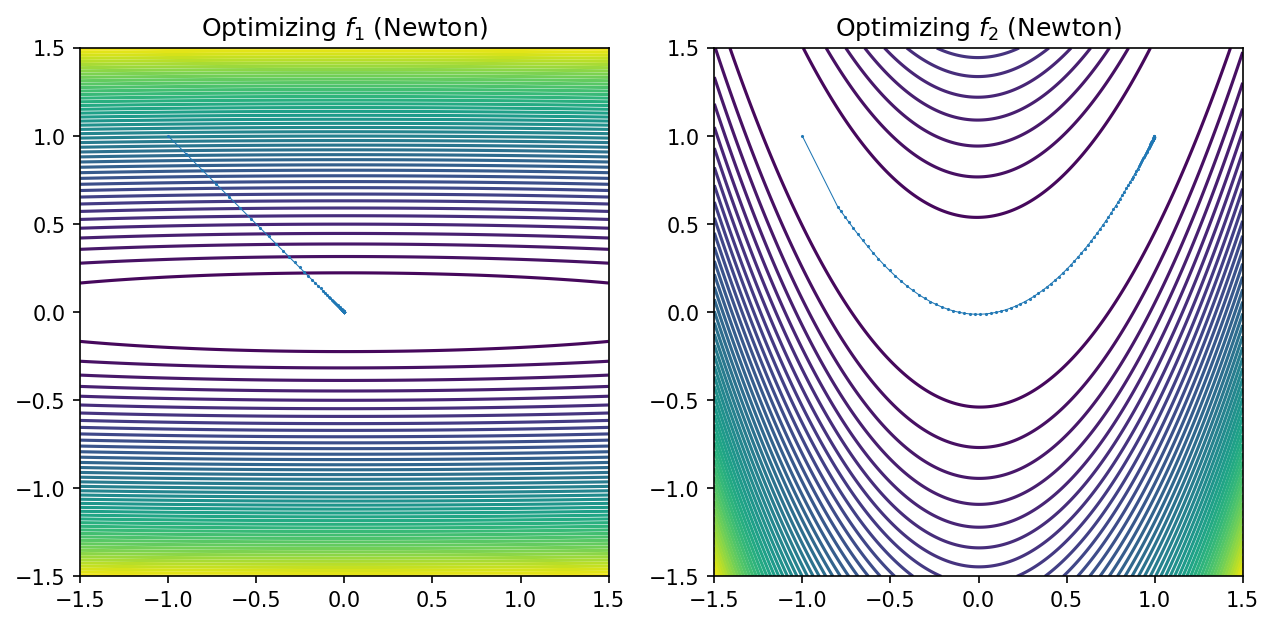

In [16]:
plt.figure(dpi = 150, figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.contour(x, y, f1([x, y]), 50)
plt.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.gca().set_aspect('equal')
plt.title('Optimizing $f_1$ (Newton)')

plt.subplot(1, 2, 2)
plt.contour(x, y, f2([x, y]), 50)
plt.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.gca().set_aspect('equal')
plt.title('Optimizing $f_2$ (Newton)')

As mentioned, due to the large step size GD fails! However, Newton's method arrives at the minimum rather quickly!

In [17]:
# Setting step-size:
eta = 1
# Gradient descent for f1
f1_gd, X1_gd = perform_optimization(gradient_descent, f1, g1, H1, X0, 
                                    eta, max_its, tolerance
                                   )
# Gradient descent for f2
f2_gd, X2_gd = perform_optimization(gradient_descent, f2, g2, H2, X0, 
                                    eta, max_its, tolerance
                                   )
# Newton descent for f1
f1_newton, X1_newton = perform_optimization(newtons_method, f1, g1, H1, X0, 
                                            eta, max_its, tolerance
                                           )
# Newton descent for f2
f2_newton, X2_newton = perform_optimization(newtons_method, f2, g2, H2, X0, 
                                            eta, max_its, tolerance
                                           )

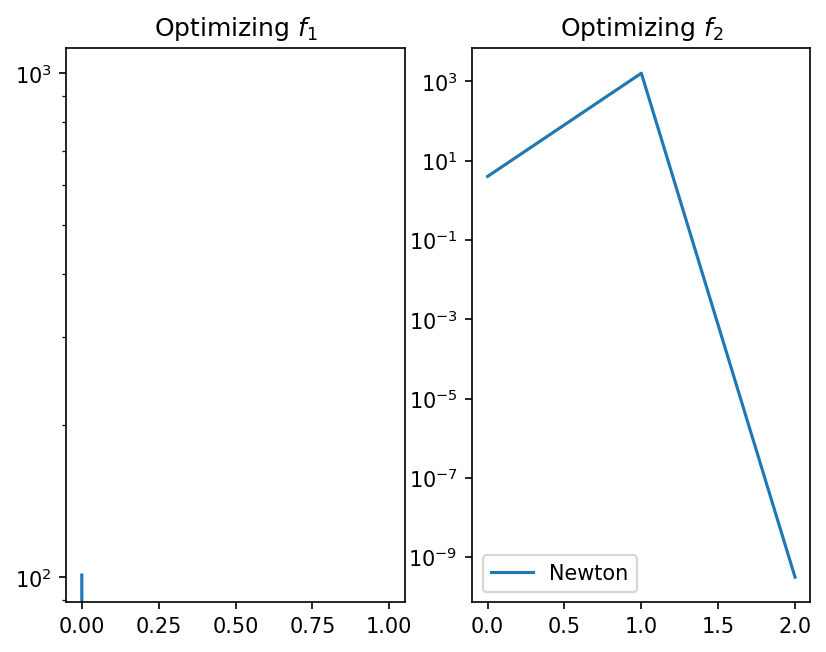

In [19]:
plt.figure(dpi = 150)
plt.subplot(1, 2, 1)
# plt.semilogy(f1_gd, label = 'GD')
plt.semilogy(f1_newton, label = 'Newton')
plt.title('Optimizing $f_1$')

plt.subplot(1, 2, 2)
# plt.semilogy(f2_gd, label = 'GD')
plt.semilogy(f2_newton, label = 'Newton')
plt.title('Optimizing $f_2$')
plt.legend()

Text(0.5, 1.0, 'Optimizing $f_2$ (Newton)')

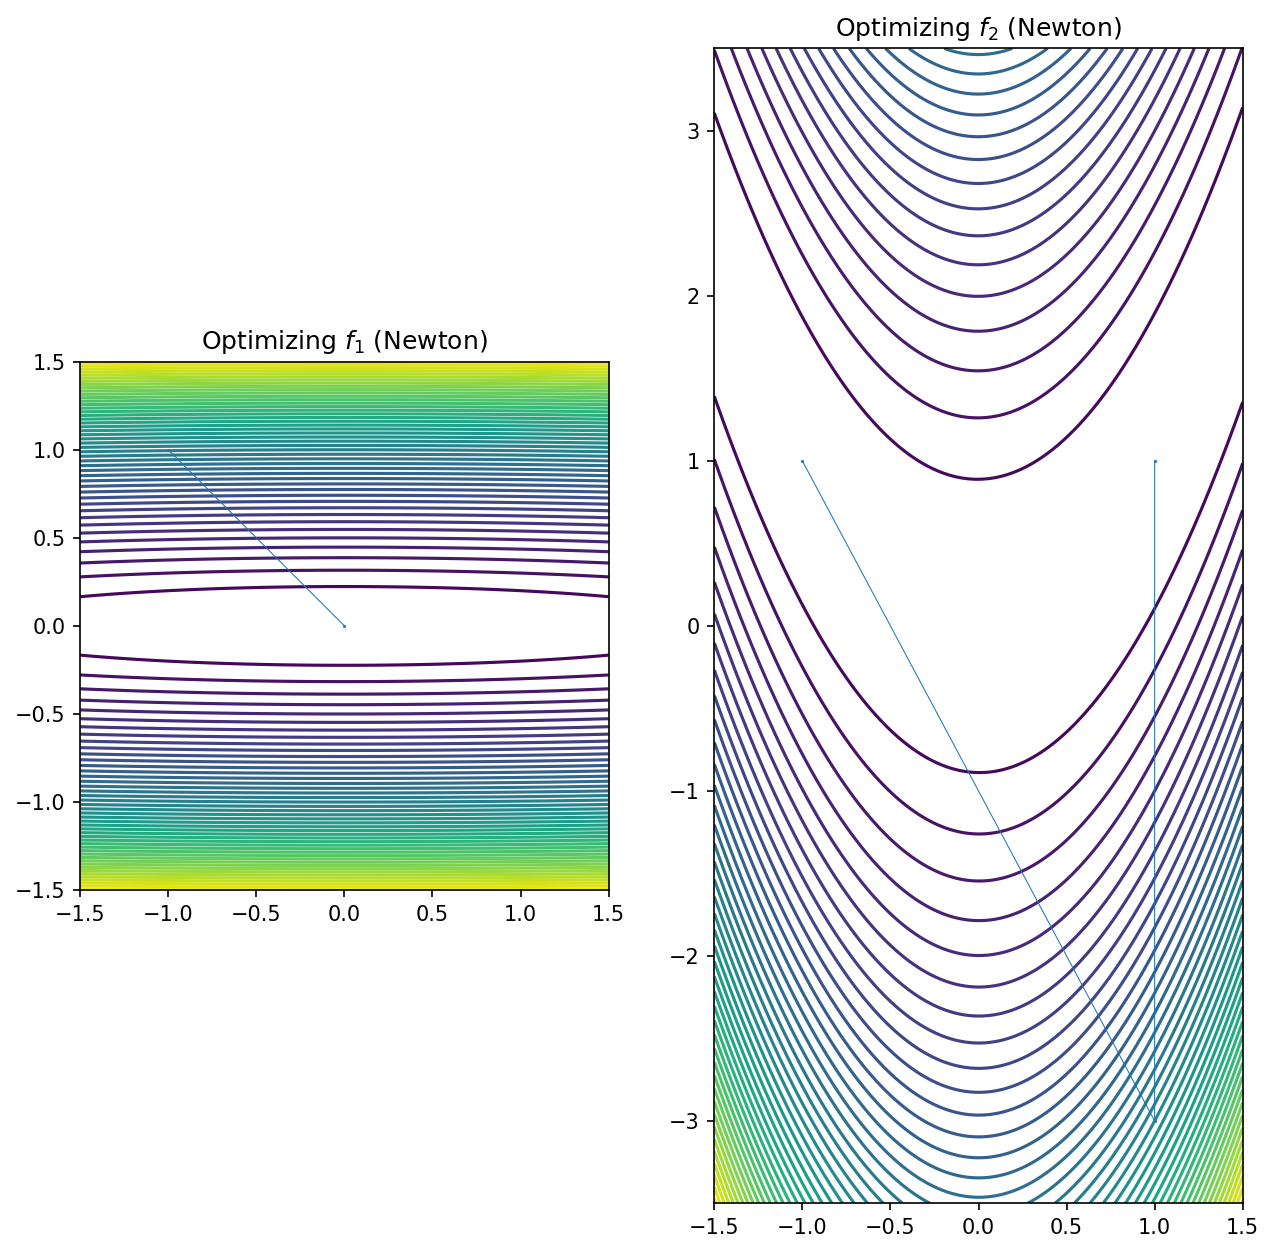

In [21]:
x2, y2 = jnp.meshgrid(jnp.linspace(-1.5, 1.5, 301), jnp.linspace(-3.5, 3.5, 701))

# Skipping this!
# NOTE: As we can see the choice of stepsize results in GD to blow up!
plt.figure(dpi = 150, figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.contour(x, y, f1([x, y]), 50)
plt.plot(X1_newton[:, 0], X1_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.gca().set_aspect('equal')
plt.title('Optimizing $f_1$ (Newton)')

plt.subplot(1, 2, 2)
plt.contour(x2, y2, f2([x2, y2]), 50)
plt.plot(X2_newton[:, 0], X2_newton[:, 1], '-o', markersize = 0.5, lw = 0.5)
plt.title('Optimizing $f_2$ (Newton)')

As mentioned earlier, you can see that Newton arrives at the minimum in a single step for the scaled quadratic function. Even for the Rosenbrock function, we arrive at the true minimum in 2 steps. So the choice of $\eta = 1$ does incredibly well.

**BONUS**: Fun [video](https://www.youtube.com/watch?v=-RdOwhmqP5s&ab_channel=3Blue1Brown) about how solving with Newton's method can give fractals!

### Problem 2

Download the MNIST data-set of hand written digits from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/).

(1) Parse the data and keep the 1,000 images and their associated labels for each of the following digits: 0, 1, 2. Further, randomly permute the data, and for each digit split the dataset to select 80 percent of the data for training and 20 percent for testing. Each image should have $28\times 28$ pixels.

(2) Implement a logistic regression model and train it using gradient descent only on digit 0 and digit 1. The loss function that you should use is the binary cross entropy loss. Report the accuracy of your model on the test data and provide a visualization of the resulting [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

(3) Perform logistic regression on all three digits (i.e. 0,1,2). In this case you need to use a one-hot encoding of the output labels and the multi-class cross entropy loss. Report the accuracy of your model on the test data and provide a visualization of the resulting confusion matrix.

In [1]:
# Importing libraries and functions used:
import jax
import jax.numpy as jnp
from jax.tree_util import tree_map
import numpy as np
from einops import rearrange
from tqdm import trange
# For figures and plotting:
import matplotlib.pylab as plt
# Used for the confusion matrix
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [3]:
# Get the data and normalize
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = rearrange(x_train, 'b h w -> b (h w)')/255.
x_test = rearrange(x_test, 'b h w -> b (h w)')/255.

# Gather all data
inputs = jnp.concatenate([x_train, x_test], axis=0)
targets = jnp.concatenate([y_train, y_test], axis=0)

print(inputs.shape)
print(targets.shape)

(70000, 784)
(70000,)


In [11]:
# We are told to retain 1000 images and labels for 0, 1, 2
# Finding indices from labels which satisfy this:
idx0 = np.where(targets == 0)[0]
idx1 = np.where(targets == 1)[0]
idx2 = np.where(targets == 2)[0]

# Additionally, we are told to take 1000 images
idx0 = np.random.permutation(idx0)[:1000]
idx1 = np.random.permutation(idx1)[:1000]
idx2 = np.random.permutation(idx2)[:1000]
# And perform a 80 / 20 split for training and test
idx_train = np.concatenate((idx0[:800], idx1[:800], idx2[:800]))
idx_test  = np.concatenate((idx0[800:], idx1[800:], idx2[800:]))
# Performing a random permutation:
idx_train = np.random.permutation(idx_train)
idx_test  = np.random.permutation(idx_test)
# Getting the corresponding images and labels
imgs_train, lbls_train = inputs[idx_train], targets[idx_train]
imgs_test,  lbls_test  = inputs[idx_test],  targets[idx_test]

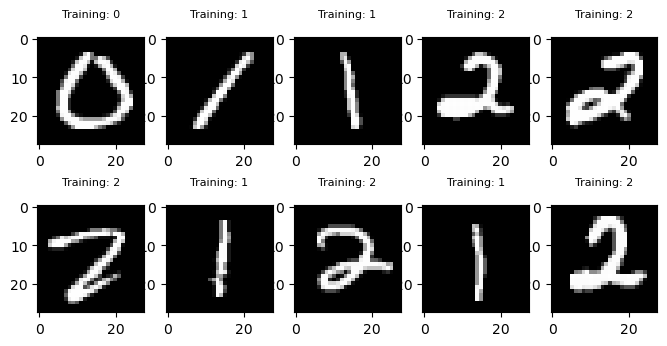

In [54]:
# Visualizing if the mapping is performed correctly:
plt.figure(figsize=(8,4))
for index, (image, label) in enumerate(zip(imgs_train[0:10], lbls_train[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 8)
plt.show()

In [44]:
# Getting the data corresponding to 0 and 1:
idx              = (lbls_train == 0) | (lbls_train == 1)
X_train, y_train = imgs_train[idx], lbls_train[idx].reshape(-1, 1)
idx              = (lbls_test == 0) | (lbls_test == 1)
X_test, y_test   = imgs_test[idx], lbls_test[idx].reshape(-1, 1)

In [45]:
@jax.jit
def loss_fn(params, X, y):
    eps = 1e-7
    y_hat = jax.nn.sigmoid(X @ params)
    loss = -(y * jnp.log(y_hat + eps) + (1.0 - y) * jnp.log(1 - y_hat + eps))
    return jnp.mean(loss) 
    

# Computing Gradients:
grad_loss = jax.jit(jax.grad(loss_fn))

In [48]:
# Initializing weights as zeros:
params = jnp.zeros((784,1))

# Gradient descent
# Learning Rate
alpha = 1e-2
n_its = 10000

loss_history = [loss_fn(params, X_train, y_train)]
for i in trange(n_its):
    g      = grad_loss(params, X_train, y_train)
    params = params - alpha * g

    # Track progress:
    loss_history = loss_history + [loss_fn(params, X_train, y_train)]

100%|██████████| 10000/10000 [00:04<00:00, 2086.49it/s]


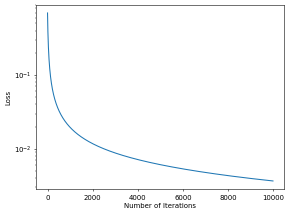

In [49]:
plt.figure(dpi = 50)
plt.plot(loss_history)
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Number of Iterations')
plt.show()

In [50]:
# Computing Accuracy Score and Resulting Confusion Matrix for test set:
y_pred = jax.nn.sigmoid(X_test @ params)
accuracy_score = (jnp.round(y_pred) == y_test).mean()
cm             = metrics.confusion_matrix(y_test, jnp.round(y_pred))
cm_normalized  = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print('Accuracy Score on Test Set:', accuracy_score)

Accuracy Score on Test Set: 1.0


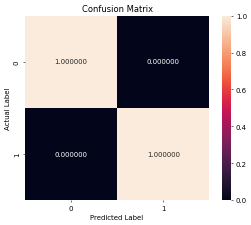

In [51]:
plt.figure(dpi = 50)
sns.heatmap(cm_normalized, fmt = '4f', annot = True, square = True);
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Now training on all 3 digits:
X_train, y_train = imgs_train, lbls_train
X_test,  y_test  = imgs_test,  lbls_test
# In this case we need to use a one-hot representation
y_train = jax.nn.one_hot(y_train, num_classes=3)
y_test = jax.nn.one_hot(y_test, num_classes=3)

In [35]:
def forward(params, X):
    return jax.nn.softmax(X @ params)

@jax.jit
def loss_fn(params, X, y):
    # Small parameter to prevent log from throwing nans
    eps   = 1e-7
    y_hat = jax.nn.softmax(X @ params)
    loss  = -(y * jnp.log(y_hat + eps))
    return jnp.mean(loss)

# Computing Gradients:
grad_loss = jax.jit(jax.grad(loss_fn))

In [40]:
# Initializing weights as zeros:
params = jnp.zeros([784, 3])

# Gradient descent
# Learning Rate
alpha = 1e-2
n_its = 10000

loss_history = [loss_fn(params, X_train, y_train)]
for i in trange(n_its):
    g      = grad_loss(params, X_train, y_train)
    params = tree_map(lambda x, g: x - alpha * g, params, g)

    # Track progress:
    loss_history = loss_history + [loss_fn(params, X_train, y_train)]

100%|██████████| 10000/10000 [00:24<00:00, 404.18it/s]


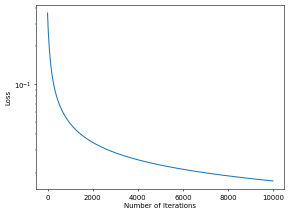

In [41]:
plt.figure(dpi = 50)
plt.plot(loss_history)
plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Number of Iterations')
plt.show()

In [42]:
# Computing Accuracy Score and Resulting Confusion Matrix for test set:
y_pred = jax.nn.softmax(X_test @ params)
accuracy_score = (jnp.argmax(y_pred, axis = 1) == jnp.argmax(y_test, axis = 1)).mean()
cm             = metrics.confusion_matrix(jnp.argmax(y_test, axis = 1), 
                                          jnp.argmax(y_pred, axis = 1))
cm_normalized  = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Accuracy Score on Test Set:', accuracy_score)

Accuracy Score on Test Set: 0.975


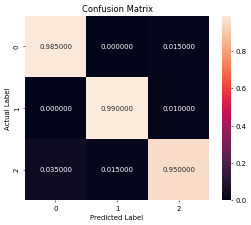

In [43]:
plt.figure(dpi = 50)
sns.heatmap(cm_normalized, fmt = '4f', annot = True, square = True);
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Problem 3

In this question, we will study different techniques for optimizing the regression weights $\alpha$ and $\beta$ of a linear regression model $y \sim \mathcal{N}(x_i\alpha + \beta, 1^2)$, where the training data is generated using $\alpha = 5$ and $\beta = 1$. Specifically, create a training data-set by generating 1,000 data points using $x$ uniformly distributed in $[-1, 1]$ and perturb the observed outputs $y_i$ with a zero-mean uncorrelated Gaussian noise $\mathcal{N}(0, 1)$. For all the following questions, please start your initial guess for the parameters at $(\alpha_0, \beta_0)=(0.5, 0.5)$ and set your learning rate to $\eta = 0.002$. Write down your own Python code to implement the following methods.

(1) Use gradient descent to find $\alpha$ and $\beta$. Also report the negative log-likelihood and the parameter trajectory over a contour plot in the parameter space.

(2) Repeat the previous question using Newton's method.

(3) The Fisher Information Matrix is defined as:
$F = \mathbb{E}_{p(x\lvert \theta)}[\nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T]$
Prove that negative expected Hessian of log-likelihood is equal to the Fisher Information Matrix $F$.

(4) Prove that Fisher Information Matrix F is the Hessian of KL-divergence between two distributions $p(x\lvert \theta)$ and $p(x\lvert \theta')$ with respect to $\theta'$ evaluated at $\theta' = \theta$.

(5) Given a number of data $X = \{x_1, ..., x_n\}$, the empirical Fisher Information Matrix could be written as:

$F = \frac{1}{n}\sum_{i=1}^n[\nabla_{\theta}\log p(x_i \lvert \theta)\nabla_{\theta}\log p(x_i \lvert \theta)^T]$

Conduct a simulation study using the natural gradient descent update rule:

$\theta = \theta - \eta F^{-1}g(\theta)$

to find $\alpha$ and $\beta$, where $g(\theta)$ is the gradient of the parameters. Contrast the trajectory you observe for (3a) and (3b), and briefly describe what we can infer from this result.

### Solution

(3)

\begin{align}
	\mathbb E [-\nabla^2 \log p(x|\theta)] &= -\int p(x|\theta)\nabla^2 \log p(x|\theta) dx\\
	&=\int p(x|\theta)\frac{p(x|\theta)\nabla p(x|\theta)\nabla p(x|\theta)^T - \nabla^2 p(x|\theta)}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta)\nabla p(x|\theta)\nabla p(x|\theta)^T}{p(x|\theta)^2} dx - \int p(x|\theta)\frac{\nabla^2 p(x|\theta)}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta)\nabla p(x|\theta)\nabla p(x|\theta)^T}{p(x|\theta)^2} dx - \nabla^2 \int p(x|\theta)dx\\
	&=\int p(x|\theta)\nabla \log p(x|\theta)\nabla \log p(x|\theta)^Tdx\\
	&=\mathbb E_{p(x|\theta)} [\nabla \log p(x|\theta)\nabla \log p(x|\theta)^T] \\
    &= F
\end{align}

(4) 
The KL divergence $D_{KL} = \int p(x|\theta)\log\frac{p(x|\theta)}{p(x|\theta')}dx$. And its Hessian

\begin{align}
	\nabla^2 D_{KL}(p(x|\theta), p(x|\theta')) &=\nabla^2 \int p(x|\theta)(\log p(x|\theta) -\log p(x|\theta'))dx\\
	&= \int p(x|\theta)\frac{p(x|\theta')\nabla p(x|\theta')\nabla p(x|\theta')^T - \nabla^2 p(x|\theta')}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta')\nabla p(x|\theta')\nabla p(x|\theta')^T}{p(x|\theta)^2} dx - \int p(x|\theta)\frac{\nabla^2 p(x|\theta')}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta')\nabla p(x|\theta')\nabla p(x|\theta')^T}{p(x|\theta)^2} dx - \nabla^2 \int p(x|\theta')dx\\
	&=\int p(x|\theta)\nabla \log p(x|\theta')\nabla \log p(x|\theta')^Tdx\\
	&=\mathbb E_x \nabla \log p(x|\theta')\nabla \log p(x|\theta')^T,
\end{align}

where the last term vanish since $\int p(x|\theta') dx = 1$ is a constant.

When $\theta' = \theta$,

$\nabla^2 D_{KL}(p(x|\theta), p(x|\theta')) = E_x \nabla \log p(x|\theta)\nabla \log p(x|\theta)^T.$

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [ ]:
def loglkl(x,y,k):
    a = k[0]
    b = k[1]
    dev = a*x + b - y
    y = float(len(x)/2*np.log(2*np.pi) + 0.5*dev.T@dev)
    return y

def gridloglkl(x,y,WX,WY):
    l = np.zeros([len(WY), len(WX)])
    for i, w1 in enumerate(WX):
        for j, w2 in enumerate(WY):
            g = np.array([[w1],[w2]])
            l[j,i] = loglkl(x,y,g)
    return l
    
def gradient(x,y,k):
    a = k[0,0]
    b = k[1,0]
    n = len(x)
    beta = b + np.zeros([n,1])
    g = np.zeros([2,1])
    g[0] = a*x.T@x + beta.T@x - x.T@y
    g[1] = n*b + np.sum(a*x - y)
    return g

# def hessian(x,y):
#     return np.array([[x.T@x, np.sum(x)],[np.sum(x), len(x)]]).astype(np.float)

def hessian(x, y):
    # Check if x is 1D or multidimensional
    if len(x.shape) == 1 or x.shape[1] == 1:  # 1D vector (or column vector)
        # Convert to column vector if needed
        x_col = x.reshape(-1, 1) if len(x.shape) == 1 else x
        return np.array([[np.sum(x_col**2), np.sum(x_col)],
                         [np.sum(x_col), len(x_col)]]).astype(np.float64)
    else:
        # For multivariate x
        ones = np.ones((x.shape[0], 1))
        H = np.zeros((2, 2))
        H[0, 0] = np.sum(x**2) 
        H[0, 1] = H[1, 0] = np.sum(x)
        H[1, 1] = x.shape[0]
        return H.astype(np.float64)

def fischerinfo(x,y,k):
    fischer = np.zeros([2,2])
    for i in range(0,len(x)):
        g = gradient(x[i],y[i],k)
        fischer = fischer + g@g.T
    return fischer/len(x)

def gdstep(x,y,tempw, eta = 0.002):
    return tempw - eta*gradient(x,y,tempw)

def ntstep(x,y,tempw,eta = 0.002):
    # Eta is not used but set for the convenience of ADT
    return tempw - np.linalg.inv(hessian(x,y))@gradient(x,y,tempw)

def ngdstep(x,y,tempw,eta = 0.002):
    return tempw - eta*np.linalg.pinv(fischerinfo(x,y,tempw))@gradient(x,y,tempw)

def itermethod(x,y,stepfunc,itmax = 100, init = np.array([[0.5],[0.5]]), eta = 0.002,tol = 0.001):
    i = 0
    delta = 1
    ngdw = init
    tempw = ngdw.copy()
    diff = 1
    ngdloss = np.array([loglkl(x,y,ngdw[:,-1].T)])
    # The iteration is terminated once it begins to oscillate.
    while delta > tol and i < itermax and diff > -tol:
        tempw = stepfunc(x,y,tempw,eta = 0.002)
        ngdw = np.hstack((ngdw,tempw))
        ngdloss = np.hstack((ngdloss, loglkl(x,y,tempw)))
        delta = np.abs(loglkl(x,y,ngdw[:,-2]) - loglkl(x,y,ngdw[:,-1]))
        diff = loglkl(x,y,ngdw[:,-2]) - loglkl(x,y,ngdw[:,-1])
        i = i + 1
    ngditernum = i
    # Returns stepwise loss, parameters and number of iteration
    return ngdloss,ngdw,ngditernum

In [81]:
x = random.uniform(-1,1,1000).reshape(-1,1)
y = 5*x + 1 + random.normal(0,1,[1000,1])
gdw = np.array([[0.5],[0.5]])
gdloss = np.array([loglkl(x,y,gdw[:,-1])])
tempw = gdw.copy()
itermax = 100

# Gradient descent
gdloss,gdw,gditernum = itermethod(x,y,gdstep,eta = 0.002)
# Newton method
ntloss,ntw,ntiternum = itermethod(x,y,ntstep,eta = 0.002)
# Natual gradient descent
ngdloss,ngdw,ngditernum = itermethod(x,y,ngdstep,eta = 0.002)

/var/folders/t4/1_pnvgvd6c9c4yp4lfkz5jww0000gp/T/ipykernel_2328/161541101.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(len(x)/2*np.log(2*np.pi) + 0.5*dev.T@dev)


/var/folders/t4/1_pnvgvd6c9c4yp4lfkz5jww0000gp/T/ipykernel_2328/161541101.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(len(x)/2*np.log(2*np.pi) + 0.5*dev.T@dev)


Text(0.5, 1.0, 'Likelihood during iteration, eta = 0.002')

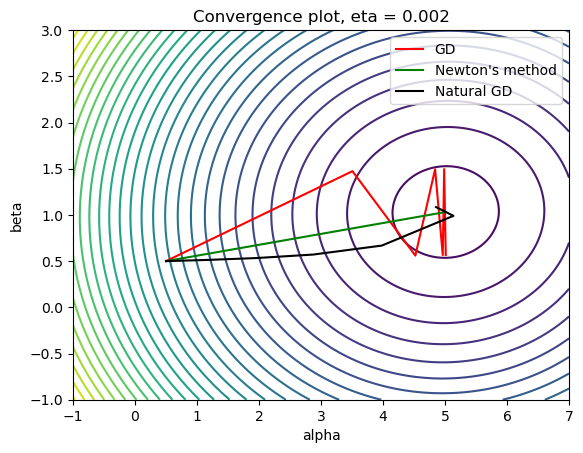

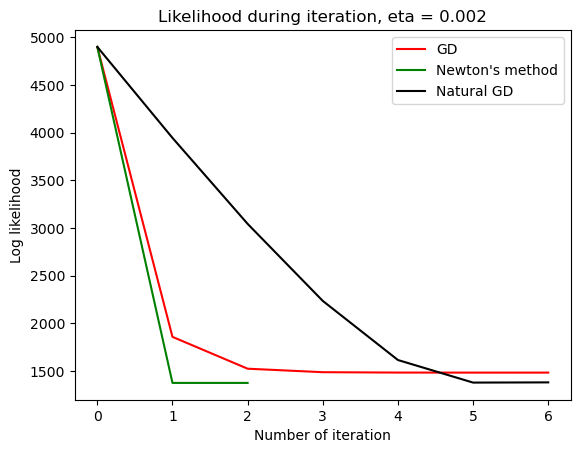

In [82]:

gridsz = 500
xmin = -1
xmax = 7
ymin = -1
ymax = 3

wx = np.linspace(xmin,xmax,gridsz)
wy = np.linspace(ymin,ymax,gridsz)
WX,WY = np.meshgrid(wx,wy)
Z = gridloglkl(x,y,wx,wy)
fig, ax = plt.subplots(1)
contour = ax.contour(WX,WY,Z,30)
ax.set_xlabel("alpha")
ax.set_ylabel("beta")
ax.set_title("Convergence plot, eta = 0.002")
ax.plot(gdw[0,:],gdw[1,:], c = 'r')
ax.plot(ntw[0,:],ntw[1,:], c = 'g')
ax.plot(ngdw[0,:],ngdw[1,:], c = 'k')
ax.legend(['GD','Newton\'s method','Natural GD'])

fig1, ax1 = plt.subplots(1)

ax1.set_xlabel('Number of iteration')
ax1.set_ylabel('Log likelihood')
ax1.plot(range(len(gdloss)), gdloss, c = 'r')
ax1.plot(range(len(ntloss)), ntloss, c = 'g')
ax1.plot(range(len(ngdloss)), ngdloss, c = 'k')
ax1.legend(['GD','Newton\'s method','Natural GD'])
ax1.set_title('Likelihood during iteration, eta = 0.002')

As can be observed, on this ill-conditioned landscape, gradient descent requires a much larger number of iterations to arrive at the exact minimum. As can be observed, GD gets stuck in a valley after the initial progress where the gradients are much smaller. However, the preconditioning of the Fisher Information matrix in the case of natural gradient descent allows us to arrive at the correct minimum with fewer iterations.